# Test: Distributed/Statistical Analysis/CORRELATION HEATMAP

## Correlation heatmap

Correlation often refers to how close two variables are to having a linear relationship with each other. It can indicate a predictive relationship but in general, but the presence of a correlation is not sufficient to infer the presence of a causal relationship.

To measure the degree of correlation, we use $\rho$ the Pearson correlation coefficient, which is sensitive only to a linear relationship between two variables. When there are more than two varaibles, correlations are gather in a matrix. This matrix is displayed as a heatmap.  

The Pearson correlation is in the interval $[1,-1]$. The closer the coefficient is to either −1 or 1, the stronger the correlation between the variables.

## Preliminary analysis

To compute a correlation heatmap we just need at least two continuous variables with a non zero variance. 

## Implementation

### Dowload data

Download study database from the subproject: sample-data-db-setup.
Reduce the data to three columns of continuous variables and after, remove the rows that contain 'NAN' value.

In [34]:
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

dataRaw = pd.read_csv('Data/desd-synthdata.csv')
data = dataRaw[['righthippocampus', 'lefthippocampus', 
                    'rightacgganteriorcingulategyrus']]
data = data.dropna()
data.head()


,righthippocampus,lefthippocampus,rightacgganteriorcingulategyrus
1,3.7933,3.4613,4.1324
2,3.5737,3.3827,4.0314
3,3.4143,3.1983,4.4445
4,2.9331,2.6429,4.3118
5,3.0757,2.8996,3.4940


### Display colored heatmap

## display proposal

A common way to show correlations is to use PairGrid in which diagonal contains histogram of the variables, upper part contains correlation and lower part contains statistics such as correlation coeficient $\rho$.

/Users/phenixt/anaconda3/envs/Statistics/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


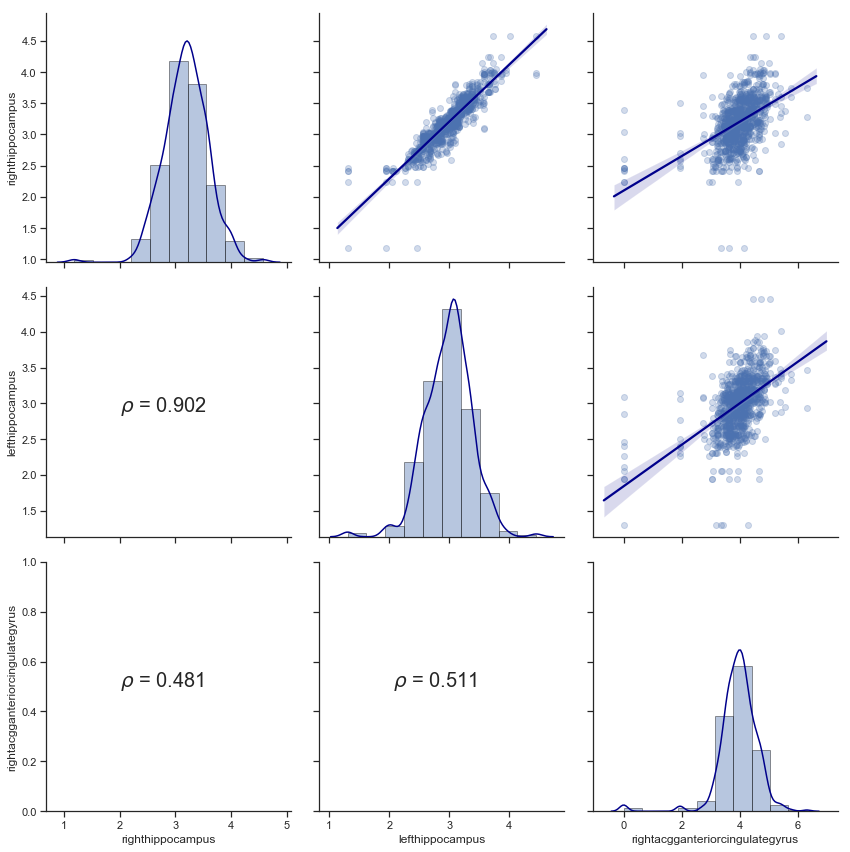

In [35]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

def corr(x, y, **kwargs):
    ''' compute the correlation coeficient and display it in a label'''
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 3))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 0.5), size = 20, xycoords = ax.transAxes)


sns.set(style="ticks")
sns.set_palette("deep")

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data,
                   vars = ['righthippocampus', 'lefthippocampus', 
                    'rightacgganteriorcingulategyrus'], 
                    height = 4)

# Map a scatter plot to the upper triangle
grid = grid.map_upper(sns.regplot,
                     line_kws={"color": "darkblue"},
                     scatter_kws={"alpha": "0.25"})

# Map a histogram to the diagonal
grid = grid.map_diag(sns.distplot, 
                     bins = 10, 
                     hist=True, 
                     kde=True, 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'color':'darkblue'})

# Map a density plot to the lower triangle
grid = grid.map_lower(corr)

# TEST in MIP
### Export result

Correlation matrix is computed and the results are written in a file that will be used in integration test phase.

In [37]:
data_transposed = data.T
corr = np.corrcoef(data_transposed)
print(corr)

[[1.         0.90191953 0.48107931]
 [0.90191953 1.         0.51135742]
 [0.48107931 0.51135742 1.        ]]


In [40]:
df_corr = pd.DataFrame(corr)
df_corr.to_csv('Output/correlationMatrix.csv')